Szymon Rogowski (405244)
Laboratorium 4

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

print("Libs loaded.")

Libs loaded.


1. Zaszumiony obraz tworzony powstaje przez dodawanie szumu do oryginalnego obrazu. Zakłada się, że szum jest nieskorelowany z obrazem dla każdej współrzędnej. Średnia wartość szumu wynosi zero. Zmniejszenie zawartości szumu można przeprowadzić przez uśrednienie wielu obrazów zaszumionych. Im więcej obrazów zaszumionych zostanie wziętych do obliczenia średniej, tym bardziej szum w każdym pikselu zmniejsza się. Utwórz serię zaszumionych obrazów korzystając z funkcji np. imnoise. Do obrazu oryginalnego dodaj szum gaussowski o następujących parametrach:

- średnia wartość szumu 0, odchyleniu standardowe 20 poziomów szarości

- średnia wartość szumu 0, odchylenie standardowe 40 poziomów szarości

Uśrednij 8, 16, 32 i 64 zaszumione obrazy dla podanych powyższych parametrów szumu. Oblicz różnicę obrazu oryginalnego i średnich obrazów a następnie wyświetl tą różnicę jako obraz. Narysuj histogramy tych różnic.

In [25]:
image_hubble_path = "images/hubble.jpg"
image_hubble = cv2.imread(image_hubble_path, cv2.IMREAD_GRAYSCALE)
image_m45_path = "images/m45.jpg"
image_m45 = cv2.imread(image_m45_path, cv2.IMREAD_GRAYSCALE)

In [26]:
def add_gaussian_noise(image, mean, std_dev):
    row, col = image.shape
    gauss = np.random.normal(mean, std_dev, (row, col))
    noisy = image + gauss
    return np.clip(noisy, 0, 255).astype(np.uint8)

def average_images(images):
    return np.mean(images, axis=0).astype(np.uint8)

def generate_noisy_images(original_image, mean_values, std_dev_values, num_images_to_average):
    noisy_images = []
    averaged_images = []
    difference_images = []

    for std_dev in std_dev_values:
        noisy_image_set = [add_gaussian_noise(original_image, mean_values[0], std_dev) for _ in range(max(num_images_to_average))]
        noisy_images.append(noisy_image_set)

        for num_images in num_images_to_average:
            noisy_set = noisy_image_set[:num_images]
            averaged_image = average_images(noisy_set)
            averaged_images.append(averaged_image)
            difference_images.append(original_image - averaged_image)

            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            plt.imshow(averaged_image, cmap='gray')
            plt.title(f'Difference Image (std={std_dev}, num images={num_images})')
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.hist(averaged_image.ravel(), bins=256, range=[0, 256])
            plt.title(f'Histogram (std={std_dev}, num images={num_images})')
            plt.xlabel('Pixel Value')
            plt.ylabel('Frequency')

            plt.show()


In [27]:
# noise parameters
mean_values = [0, 0]
std_dev_values = [20, 40]

# number of images to average
num_images_to_average = [4,256]

In [28]:
generate_noisy_images(image_hubble, mean_values, std_dev_values, num_images_to_average)

KeyboardInterrupt: 

In [ ]:
generate_noisy_images(image_m45, mean_values, std_dev_values, num_images_to_average)

2. Szum periodyczny na obrazie można zanalizować w dziedzinie częstotliwości. Szum periodyczny pojawia się w widmie częstotliwości jako skoncentrowane impulsy energii. Położenie tych impulsów odpowiada częstotliwościom periodycznego szumu. Przez zastosowanie selektywnego filtra pasmowego lub wycinającego można usunąć szum. Usuń z obrazu szum periodyczny przez filtrowanie w dziedzinie częstotliwości. Zaproponuj filtr w dziedzinie obrazu wykonujący to samo zadanie.

In [102]:
image_moon_path = "images/moon.png"
image_moon = cv2.imread(image_moon_path, cv2.IMREAD_GRAYSCALE)
image_face_path = "images/face.jpg"
image_face = cv2.imread(image_face_path, cv2.IMREAD_GRAYSCALE)

In [124]:
def generate_gaussian_frequency_filter(shape, w, radius_list):
    u, v = np.arange(-shape[1]//2, shape[1]//2),  np.arange(-shape[0]//2, shape[0]//2)
    U, V = np.meshgrid(u, v)
    D = np.sqrt(U**2 + V**2)
    H = 1
    for radius in radius_list:
        H_helper = 1 - np.exp(-0.5 * (((D**2 - radius**2) / (D * w)) ** 2))
        H *= H_helper
    return H

def apply_filter(img, width, radius_list):
    f_img = np.fft.fft2(img)
    f_shift = np.fft.fftshift(f_img)
    r, c = img.shape
    filter = generate_gaussian_frequency_filter((r, c), width, radius_list)

    f_result = f_shift * filter
    result_image = np.abs(np.fft.ifft2(np.fft.ifftshift(f_result)))

    plt.figure(figsize=(12, 6))

    plt.subplot(131), plt.imshow(img, cmap='gray')
    plt.title('Input'), plt.xticks([]), plt.yticks([])

    plt.subplot(132), plt.imshow(np.log(np.abs(f_shift) + 1) + np.log(np.abs(filter) + 1), cmap='gray')
    plt.title('Spectrum + mask'), plt.xticks([]), plt.yticks([])

    plt.subplot(133), plt.imshow(result_image, cmap='gray')
    plt.title('After gaussian filter'), plt.xticks([]), plt.yticks([])

    plt.show()

C:\Users\szymo\AppData\Local\Temp\ipykernel_15336\3255958461.py:7: RuntimeWarning: divide by zero encountered in divide
  H_helper = 1 - np.exp(-0.5 * (((D**2 - radius**2) / (D * w)) ** 2))


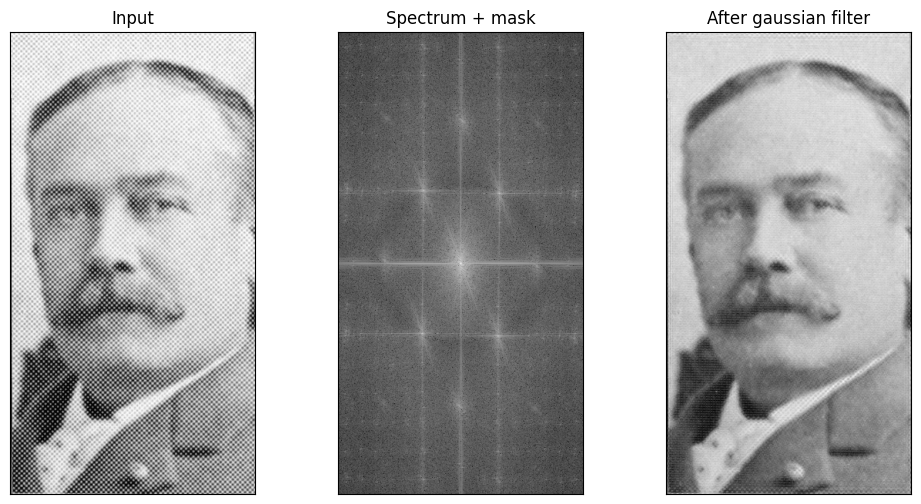

In [125]:
width = 22
radius_list = [105]
apply_filter(image_face, width, radius_list)

C:\Users\szymo\AppData\Local\Temp\ipykernel_15336\3255958461.py:7: RuntimeWarning: divide by zero encountered in divide
  H_helper = 1 - np.exp(-0.5 * (((D**2 - radius**2) / (D * w)) ** 2))


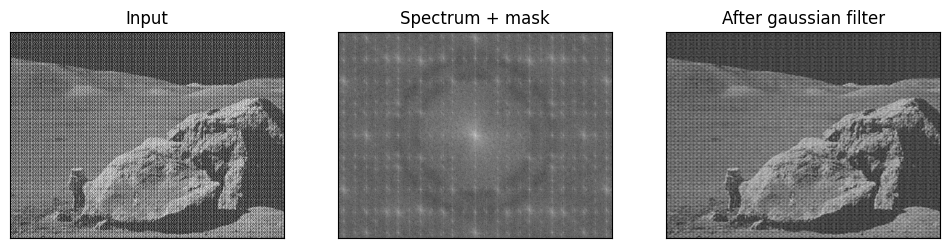

In [126]:
width = 22
radius_list = [137,177]
apply_filter(image_moon, width, radius_list)